<img src="https://live.staticflickr.com/2588/4171571040_bab4a40acf_z.jpg" width="600" height="300">

# XGBOOST

* XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

* Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.
* The idea of gradient boosting originated in the observation by Leo Breiman that boosting can be interpreted as an optimization algorithm on a suitable cost function. Explicit regression gradient boosting algorithms were subsequently developed by Jerome H. Friedman, simultaneously with the more general functional gradient boosting perspective of Llew Mason, Jonathan Baxter, Peter Bartlett and Marcus Frean.
* The latter two papers introduced the view of boosting algorithms as iterative functional gradient descent algorithms. That is, algorithms that optimize a cost function over function space by iteratively choosing a function (weak hypothesis) that points in the negative gradient direction. This functional gradient view of boosting has led to the development of boosting algorithms in many areas of machine learning and statistics beyond regression and classification.

**TABLE OF CONTENTS**
* [1. Packages and Datasets](#Packages-and-Datasets)
* [2. Logistic Regresion](#Logistic-Regresion)
* [3. Support Vector Machine](#Support-Vector-Machina)
* [4. Random Forest](#Random-Forest)
* [5. XGBoost](#XGBOOST)
* [6. Model Selection](#Model-Selection)
* [7. References](#References)

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb
import pickle
import seaborn as sns

from numpy import genfromtxt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn import model_selection, metrics, linear_model
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot
import xgboost as xgb # XGBOOST
import sklearn.metrics as skm
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
pathfile = "../data/df_unido_definitivo.csv"
df = pd.read_csv(pathfile)
df.drop(['Unnamed: 0'], axis = 'columns', inplace = True)
df.head()

,int_rate,annual_inc,fico_range_low,fico_range_high,pub_rec,total_acc,last_fico_range_high,last_fico_range_low,acc_now_delinq,tot_coll_amt,tot_cur_bal,avg_cur_bal,bc_open_to_buy,bc_util,delinq_amnt,mo_sin_old_il_acct,mo_sin_rcnt_rev_tl_op,mort_acc,num_bc_sats,num_tl_120dpd_2m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,application_type,emp_length,grade,hardship_flag,home_ownership,loan_status,purpose,pymnt_plan,verification_status
0,-1.326914,1.171580,0.899589,0.899572,1.201397,1.645700,0.644953,0.496383,-0.070379,-0.019969,1.965091,0.631600,1.062875,-1.755238,-0.01813,0.064164,-0.606543,0.115178,1.480831,-0.02748,0.187468,-1.027527,2.060082,1.082338,0.365039,0,1.0,0,0,1,1,1,0,0
1,2.544662,-0.387948,-0.261267,-0.261266,-0.377537,-1.726333,-0.032885,0.078142,-0.070379,-0.019969,-0.865870,-0.712643,-0.640442,1.344034,-0.01813,-2.074282,0.095377,-0.846130,-0.588304,-0.02748,-1.629146,1.477403,-0.941155,-0.937646,-0.813058,0,0.0,1,0,0,1,0,0,1
2,-1.326914,0.520515,0.567916,0.567904,-0.377537,0.083051,0.583332,0.458361,-0.070379,-0.019969,0.888317,0.082905,3.599536,-1.235665,-0.01813,-1.544575,-0.606543,1.076486,2.515399,-0.02748,0.685012,-1.106423,1.036430,-0.081818,3.038599,0,1.0,0,0,1,1,0,0,0
3,0.591176,-0.357984,-0.095430,-0.095432,2.780331,-0.410418,-0.156128,0.002098,-0.070379,-0.001552,-0.831107,-0.783683,0.385105,-1.442768,-0.01813,0.064164,-0.415110,-0.846130,0.791119,-0.02748,0.685012,-1.340292,-0.787799,-0.823838,-0.082157,0,1.0,0,0,0,1,0,0,1
4,0.591176,-0.009422,-0.261267,-0.261266,-0.377537,-1.315109,0.151980,0.192208,-0.070379,-0.019969,-0.075423,1.171392,-0.622164,1.020664,-0.01813,-0.347830,-0.478921,-0.365476,-1.278016,-0.02748,-0.472067,1.477403,-0.001468,-0.469185,-0.841910,0,1.0,0,0,1,1,0,0,1


In [3]:
x = df.drop(['loan_status'], axis='columns').values
y = df['loan_status'].values

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [5]:
def conf_matrix(Y_test, Y_pred):
    cnf_matrix_tra = confusion_matrix(Y_test, Y_pred)
    conf_plot = sns.heatmap(cnf_matrix_tra, annot=True, cmap='Blues', fmt='g')
    bottom, top = conf_plot.get_ylim()
    conf_plot.set_ylim(bottom + 0.5, top - 0.5)
    conf_plot.set_title("Confusion matrix, with normalization")
    conf_plot.set_ylabel('True Label')
    conf_plot.set_xlabel('Predicted Label');

In [6]:
xgboost_c = xgb.XGBClassifier(random_state=8080)

In [7]:
%%time
xgboost_c.fit(x_train, y_train)

Wall time: 33.2 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              random_state=8080, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [8]:
print ("Precisión del modelo: %.3f"% xgboost_c.score(x_test,y_test)*100"%"")

Precisión del modelo: 0.901


              precision    recall  f1-score   support

           0       0.80      0.81      0.80     34917
           1       0.94      0.93      0.93    103741

    accuracy                           0.90    138658
   macro avg       0.87      0.87      0.87    138658
weighted avg       0.90      0.90      0.90    138658



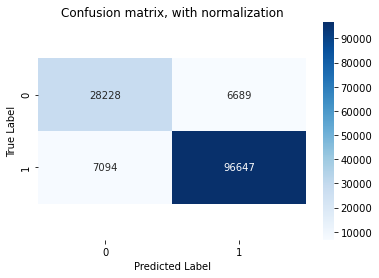

In [9]:
predic_xgb = xgboost_c.predict(x_test)
conf_matrix(y_test,predic_xgb)
print(classification_report(y_test,predic_xgb))


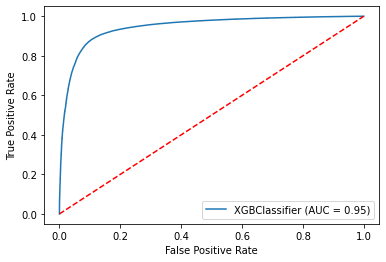

In [14]:
metrics.plot_roc_curve(xgboost_c, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

In [10]:
def save_models(filename, model):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [11]:
save_models("../model/xgboost",xgboost_c)

# References

https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7